In [52]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder


# read the CSV file into a DataFrame
df = pd.read_csv("Alle_Messungen_trimmed.csv")
df.head(1)

,Unnamed: 0,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
0,1,2023-02-27 15:02:17.156,0.0,9.722,1.278,0.0,0.0,0.0,0.0,0.0,0.0,-0.21775,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


In [53]:
df = df.drop(columns=["id", "user", "id_combined"])
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [54]:
# get all types of the df
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].astype('int64')//1e9
df.dtypes

time               float64
Accelerometer_x    float64
Accelerometer_y    float64
Accelerometer_z    float64
Gyroscope_x        float64
Gyroscope_y        float64
Gyroscope_z        float64
Magnetometer_x     float64
Magnetometer_y     float64
Magnetometer_z     float64
Orientation_qx     float64
Orientation_qy     float64
Orientation_qz     float64
class               object
dtype: object

In [55]:
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])


In [64]:
X_train, X_test, y_train, y_test = train_test_split(df.values[:, 1:13], df.values[:, 13], test_size=0.2, random_state=42)


In [56]:
# convert the DataFrame to a tensor
dataset = tf.data.Dataset.from_tensor_slices((df.values[:, 1:13], df.values[:, 13]))

In [66]:
# Split into training and testing sets
train_size = int(0.7 * len(df))
#train_dataset = dataset.take(train_size)
#test_dataset = dataset.skip(train_size)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Batch the data
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Prefetch the data


# Define your model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
64000/64000 [==============================] - 62s 951us/step - loss: 1.1001 - accuracy: 0.5938 - val_loss: 0.9080 - val_accuracy: 0.6384
Epoch 2/10
64000/64000 [==============================] - 64s 995us/step - loss: 0.9692 - accuracy: 0.6456 - val_loss: 0.8794 - val_accuracy: 0.6644
Epoch 3/10
64000/64000 [==============================] - 61s 955us/step - loss: 0.9469 - accuracy: 0.6562 - val_loss: 0.8469 - val_accuracy: 0.6922
Epoch 4/10
64000/64000 [==============================] - 65s 1ms/step - loss: 0.9384 - accuracy: 0.6580 - val_loss: 0.8340 - val_accuracy: 0.6894
Epoch 5/10
64000/64000 [==============================] - 65s 1ms/step - loss: 0.9321 - accuracy: 0.6594 - val_loss: 0.8240 - val_accuracy: 0.6867
Epoch 6/10
64000/64000 [==============================] - 60s 944us/step - loss: 0.9295 - accuracy: 0.6598 - val_loss: 0.8185 - val_accuracy: 0.7019
Epoch 7/10
64000/64000 [==============================] - 61s 959us/step - loss: 0.9290 - accuracy: 0.6601 - v

In [70]:
# Define your model
# Define your model
# Define your model
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((-1, 12), input_shape=(12,)),
    tf.keras.layers.Conv1D(32, 5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(16, 3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
64000/64000 [==============================] - 76s 1ms/step - loss: 0.4540 - accuracy: 0.8439 - val_loss: 0.3474 - val_accuracy: 0.8807
Epoch 2/10
64000/64000 [==============================] - 74s 1ms/step - loss: 0.3414 - accuracy: 0.8841 - val_loss: 0.3195 - val_accuracy: 0.8916
Epoch 3/10
64000/64000 [==============================] - 74s 1ms/step - loss: 0.3181 - accuracy: 0.8931 - val_loss: 0.3015 - val_accuracy: 0.8986
Epoch 4/10
64000/64000 [==============================] - 72s 1ms/step - loss: 0.3056 - accuracy: 0.8977 - val_loss: 0.2935 - val_accuracy: 0.9014
Epoch 5/10
64000/64000 [==============================] - 68s 1ms/step - loss: 0.2971 - accuracy: 0.9005 - val_loss: 0.2846 - val_accuracy: 0.9039
Epoch 6/10
64000/64000 [==============================] - 73s 1ms/step - loss: 0.2903 - accuracy: 0.9023 - val_loss: 0.3117 - val_accuracy: 0.8966
Epoch 7/10
64000/64000 [==============================] - 76s 1ms/step - loss: 0.2855 - accuracy: 0.9041 - val_loss: 0

In [73]:
model.evaluate(X_test, y_test)

16000/16000 [==============================] - 13s 793us/step - loss: 0.2650 - accuracy: 0.9117


[0.2650096118450165, 0.9116986989974976]

In [72]:
y_pred = model.predict(X_test)

16000/16000 [==============================] - 10s 629us/step


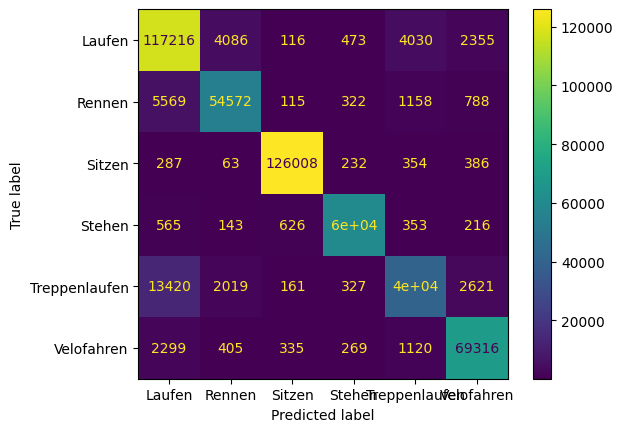

In [79]:
# plot a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets